In [10]:
import numpy as np
from scipy.signal import detrend
import matplotlib.pyplot as plt

In [11]:
# data = np.loadtxt('signal_data/00000/7254825.txt')
# # len(data)
# data

In [12]:
# plt.plot(data)

In [13]:
import cv2
import numpy as np

video = cv2.VideoCapture(r"C:\Users\sanik\Downloads\test2.mp4")

signal = []

while video.isOpened():
    _, img = video.read()
#     print(img)
    if img is None:
        break
#     img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#     img_red = img[:,:,2]
#     frame_signal = np.sum(img_red)
#     signal.append(frame_signal)
    img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    img_luma = img_ycrcb[:,:,0]
    frame_signal = np.sum(img_luma)
#     print(frame_signal)
    signal.append(frame_signal)
signal = np.array(signal)
# print(signal)

In [20]:
print(signal, len(signal))

[20500230 20585160 20682329 20764759 20867443 20965384 21047394 21128077
 21210382 21279813 21359965 21432291 21518155 21578143 21578842 21509368
 21436572 21384048 21374337 21372066 21391533 21428107 21396517 21395985
 21402377 21410806 21423896 21444014 21488390 21522544 21593079 21616803
 21653319 21697118 21685787 21541261 21390436 21351059 21309688 21290438
 21280828 21276226 21280729 21289384 21296474 21310312 21328678 21343712
 21374427 21406000 21437363 21463441 21497516 21530639 21572486 21580542
 21526771 21350636 21301918 21223855 21180263 21175969 21174101 21179918
 21204532 21235779 21255115 21272910 21290562 21320842 21356763 21388663
 21428392 21468138 21512586 21554879 21593447 21595950 21507543 21335989
 21302778 21235398 21217964 21203330 21200868 21198322 21201732 21205391
 21208257 21210883 21213488 21217465 21230075 21248076 21272164 21288682
 21307267 21332955 21350016 21346669 21198999 21107459 21033820 21008689
 20990400 20975097 20966662 20962312 20959531 20959

C:\Users\sanik\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


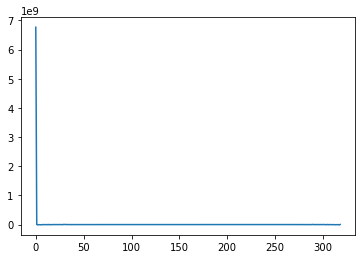

In [15]:
from scipy import fft
trfs = fft.fft(signal)
plt.plot(trfs)

In [16]:
fps = video.get(cv2.CAP_PROP_FPS)
frames = video.get(7)
# print(len(signal)/int(fps))
print(frames)

319.0


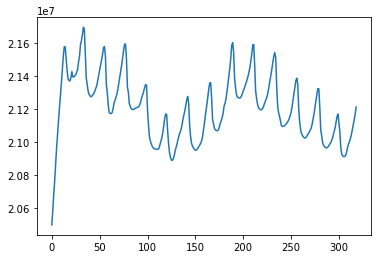

In [17]:
plt.plot(signal)

In [18]:
import heartpy as hp

[1.14521949e-033 3.71675167e-007 1.60837397e-027 1.12641180e-003
 2.19868879e-051 9.47209578e-066 2.42767469e-031 1.46856285e-012
 7.21183783e+000 1.12391335e-003 9.94934168e-015 1.25502608e-050
 1.25539418e-003 3.06624904e-006 2.36761309e-005 1.16790113e-004
 3.52523952e-001 3.59836674e-040 9.17344691e-015 2.14760275e+001
 4.33000067e-005 2.32312371e-023 5.27046765e-022 7.88441641e-058
 1.94917056e-003 1.09643976e-002 2.21743229e-024 1.52953770e-045
 3.37835804e-005 3.19991244e-004 1.11606725e-001 1.02817017e-014
 2.04601983e-021 8.82471080e-017 3.87026336e-082 1.68710532e-019
 1.48762752e-002 2.75491208e+002 1.37579880e-082 5.19186573e-058
 9.84082475e-002 6.85914197e-035 3.96764020e-001 6.45052100e-009
 1.41504965e+002 2.48752718e-037 3.76785090e-013 2.84091001e+001
 9.59772980e-021 7.19929579e+000 1.10421436e-004 2.53226848e-035
 1.47866508e-062 1.62282731e+001 1.41206994e+000 1.87337782e-002
 1.99157941e-049 7.07303617e-005 9.96971884e+001 2.69823839e-092
 1.63132340e-009 1.090011

C:\Users\sanik\anaconda3\lib\site-packages\numpy\ma\core.py:5240: RuntimeWarning: Mean of empty slice.
  result = super(MaskedArray, self).mean(axis=axis,
C:\Users\sanik\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\sanik\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\sanik\AppData\Local\Temp/ipykernel_7412/867142234.py:14: UserWarning: Warning: converting a masked element to nan.
  print('%s: %f' %(measure, m[measure]))


<Figure size 864x288 with 0 Axes>

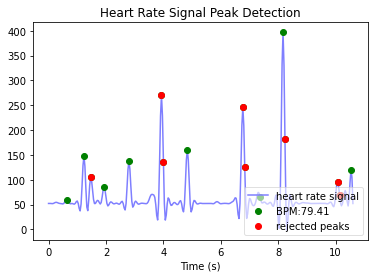

In [26]:
enhanced = hp.enhance_peaks(signal, iterations=7)
print(enhanced)

filtered = hp.filter_signal(enhanced, cutoff=5, sample_rate=30, order=4)
print(filtered)
wd, m = hp.process(filtered, sample_rate=30)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)


#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))